# Jacobi Method

In [3]:
import numpy as np

In [4]:
def jacobi(A,b, x0, tol, K):
    x_iter = []
    n = A.shape[0]
    err = tol + 1
    x = x0.copy()
    k = 0
    while err > tol and k < K:
        xold = x.copy()
        x = jacobiIter(A,b,xold)
        x_iter.append(x)
        k = k + 1
        err = np.linalg.norm(x-xold,np.inf)/np.linalg.norm(x,np.inf)
        #err = np.linalg.norm(x-xold,2)/np.linalg.norm(x,2)
    print(k)
    return x, x_iter



def jacobiIter(A,b,xold):

    n = A.shape[0]
    x = np.zeros_like(xold)
    for i in range(n):
        s = 0
        for j in range(n):
            if j!=i:
                s += A[i,j]*xold[j]
        x[i] = (b[i]- s)/A[i,i]
    return x

In [10]:
A = np. array([[2., 1., 0., 0.],
               [2., 3.,  0., 1.],
               [0., -1., -6., 2.],
               [0., 2., 1., -4.]])

b = np. array([1., 0., -2., -5 ]) 

tol = 0.0001
K = 1000
x0 = np.zeros(4)
x, x_iter = jacobi(A,b, x0, tol, K)
print(x)
len(x_iter)

13
[ 0.9909161  -0.98183318  0.81816961  0.96364228]


13

In [12]:
#Get b back
A@x

array([ 9.99999014e-01, -2.50615319e-05, -1.99989992e+00, -5.00006589e+00])

## Error Plot

In [13]:
def error(x_iter):
    errors = []
    for i in range(len(x_iter)):
        err = np.linalg.norm(A@x_iter[i] - b)
        errors.append(err)
    return errors

In [14]:
err = error(x_iter)
err[-1]

0.00012241745481077155

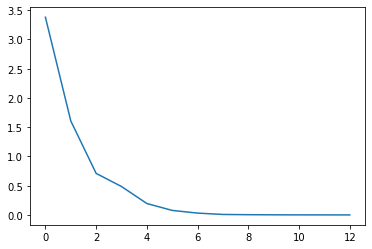

In [15]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(x_iter))],err)

# Compare with Gaussian Elimination with Partial Pivoting

In [16]:
def gaussian_partial(A, b):
    
    n = A.shape[0]
    
    C=np.c_[A,b.reshape(-1,1)]
    
    flag = 0
    
    #column
    for i in range(n-1):
            
        max_c, chosen_k  = 0, i
        
        #find the pivot
        for k in range(i, n):
            if np.abs(C[k,i]) > max_c:
                max_c = np.abs(C[k,i])
                chosen_k = k
         
        #Check if the pivot is zero
        if max_c == 0:
            flag = 1
            break
        
        #interchange rows
        if chosen_k != i:
            #Swap 2 rows
            temp = C[i,:].copy()
            C[i,:] = C[chosen_k,:]
            C[chosen_k,:] = temp
    
        
        #row
        for j in range(i+1, n):
            
            c = C[j,i]/C[i,i]
            C[j,:] = C[j,:] - c*C[i,:]
            
    return C, flag
        

def backsubstitution(T):
    
    flag=0
    n = T.shape[0]
    X = np.zeros((n))
    if T[n-1,n-1] == 0:
        flag = 1
    
    else:
    
        X[n-1] = T[n-1,n]/T[n-1,n-1] 

        for i in range(n-2,-1,-1):
            #Sum in row i
            s = 0
            for j in range(i+1, n):
                s += T[i,j]*X[j]

            X[i] = (T[i,n] - s)/T[i,i]
    
    return X, flag

In [17]:
T, err = gaussian_partial(A,b)
X, err = backsubstitution(T)

In [18]:
X

array([ 0.99090909, -0.98181818,  0.81818182,  0.96363636])

In [19]:
x

array([ 0.9909161 , -0.98183318,  0.81816961,  0.96364228])